In [1]:
import numpy as np
import pandas as pd

In [111]:
import matplotlib.pyplot as plt


In [159]:
import plotly.express as px

In [ ]:
df=pd.read_csv('Global_AI_Content_Impact_Dataset.csv')
df.head()   

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [ ]:
df[df['Country']=='China'].sort_values(by=['Year'])

In [85]:
df.columns

Index(['Country', 'Year', 'Industry', 'AI Adoption Rate (%)',
       'AI-Generated Content Volume (TBs per year)', 'Job Loss Due to AI (%)',
       'Revenue Increase Due to AI (%)', 'Human-AI Collaboration Rate (%)',
       'Top AI Tools Used', 'Regulation Status', 'Consumer Trust in AI (%)',
       'Market Share of AI Companies (%)'],
      dtype='object')

In [160]:
# Revenu to Regulation Status
regulation_status_by_revenu=df.groupby(['Regulation Status'])['Revenue Increase Due to AI (%)'].mean().reset_index()
regulation_status_by_revenu

,Regulation Status,Revenue Increase Due to AI (%)
0,Lenient,43.001270
1,Moderate,38.916842
2,Strict,37.330000


In [162]:
# fig = px.treemap(regulation_status_by_revenu, path=['Regulation Status'], values='Revenue Increase Due to AI (%)', title='Regulation Status By Revenu')
# fig.show()


In [154]:
# Revenue Increaed By Each Year
Revenu_Increased_by_each_Ai=df.groupby(['Year'])['Revenue Increase Due to AI (%)'].mean().reset_index()
Revenu_Increased_by_each_Ai

,Year,Revenue Increase Due to AI (%)
0,2020,44.202340
1,2021,42.991875
2,2022,35.484839
3,2023,33.028276
4,2024,42.450435
5,2025,38.327105


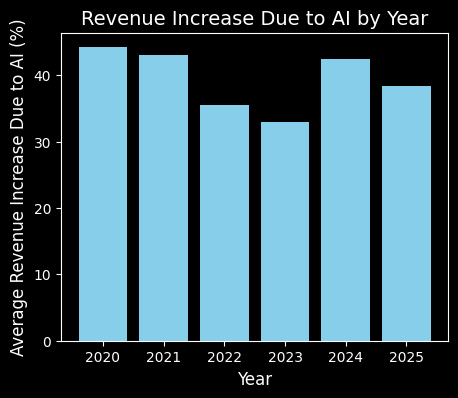

In [158]:
# Create a bar chart
plt.figure(figsize=(5, 4))
plt.bar(Revenu_Increased_by_each_Ai['Year'], 
        Revenu_Increased_by_each_Ai['Revenue Increase Due to AI (%)'], 
        color='skyblue')

# Add title and labels
plt.title('Revenue Increase Due to AI by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Revenue Increase Due to AI (%)', fontsize=12)

# Display the plot
plt.show()


In [122]:
# Market Share By each AI
Avg_Market_Share_by_AI=df.groupby(['Top AI Tools Used'])['Market Share of AI Companies (%)'].mean().reset_index()
Avg_Market_Share_by_AI.sort_values(ascending=False,by=['Market Share of AI Companies (%)'])

,Top AI Tools Used,Market Share of AI Companies (%)
5,Stable Diffusion,29.191852
2,Claude,27.468710
4,Midjourney,26.871351
3,DALL-E,26.628846
1,ChatGPT,26.010968
6,Synthesia,25.367083
0,Bard,23.852500


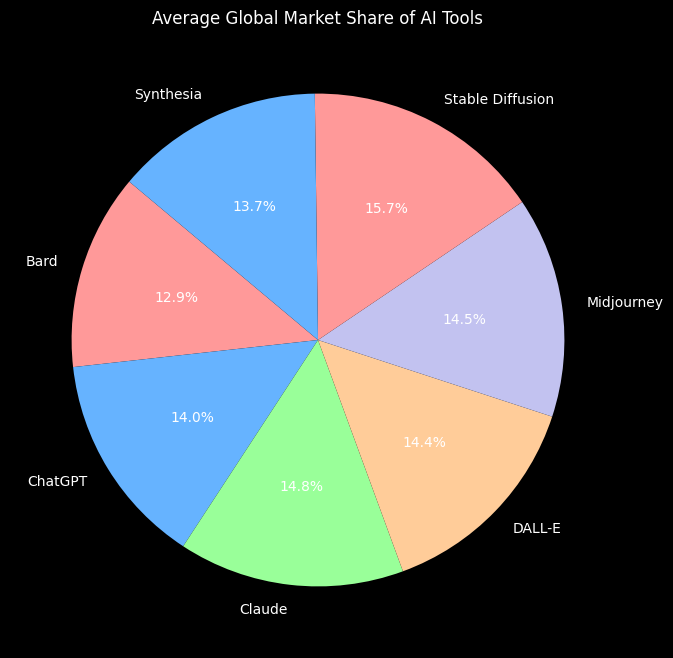

In [133]:
plt.figure(figsize=(8, 8))
plt.pie(Avg_Market_Share_by_AI['Market Share of AI Companies (%)'], 
        labels=Avg_Market_Share_by_AI['Top AI Tools Used'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Add a title
plt.title('Average Global Market Share of AI Tools')

# Show the pie chart
plt.show()


In [108]:
# Human Ai Colllabration By each AI
Avg_Successful_Collabration_by_AI=df.groupby(['Top AI Tools Used'])['Human-AI Collaboration Rate (%)'].mean().reset_index()
Avg_Successful_Collabration_by_AI.sort_values(ascending=False,by=['Human-AI Collaboration Rate (%)'])

,Top AI Tools Used,Human-AI Collaboration Rate (%)
3,DALL-E,58.225385
1,ChatGPT,58.167419
6,Synthesia,57.064583
5,Stable Diffusion,54.330741
4,Midjourney,50.950541
2,Claude,50.729677
0,Bard,50.379583


In [109]:
# Avg Human Ai Colllabration By each Country
Avg_Successful_Collabration_by_Country=df.groupby(['Country'])['Human-AI Collaboration Rate (%)'].mean().reset_index()
Avg_Successful_Collabration_by_Country.sort_values(ascending=False,by=['Human-AI Collaboration Rate (%)'])

,Country,Human-AI Collaboration Rate (%)
0,Australia,59.477333
7,South Korea,59.471500
8,UK,58.268500
9,USA,57.259524
1,Canada,55.197500
2,China,54.506667
5,India,54.201667
3,France,52.762083
4,Germany,49.627059
6,Japan,42.383182


In [163]:
fig = px.treemap(Avg_Successful_Collabration_by_Country, path=['Country'], values='Human-AI Collaboration Rate (%)', title='Ai Collaboration by each Country')
fig.show()


In [120]:
# Avg Human Ai Colllabration By each Industry
Avg_Successful_Collabration_by_Industry=df.groupby(['Industry'])['Human-AI Collaboration Rate (%)'].mean().reset_index()
Avg_Successful_Collabration_by_Industry_sorted=Avg_Successful_Collabration_by_Industry.sort_values(ascending=False,by=['Human-AI Collaboration Rate (%)'])

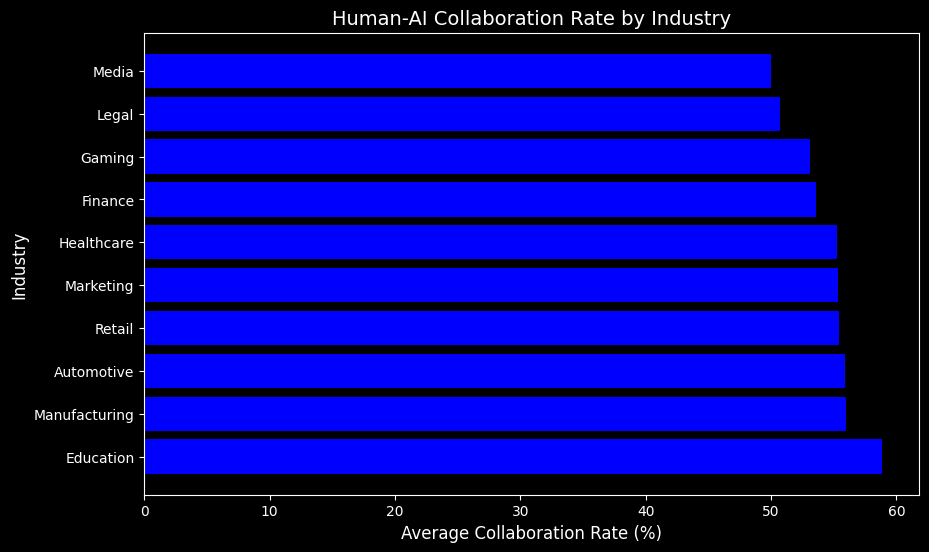

In [121]:
plt.figure(figsize=(10,6))
plt.barh(Avg_Successful_Collabration_by_Industry_sorted['Industry'], Avg_Successful_Collabration_by_Industry_sorted['Human-AI Collaboration Rate (%)'], color='blue')

plt.title('Human-AI Collaboration Rate by Industry', fontsize=14)
plt.xlabel('Average Collaboration Rate (%)', fontsize=12)
plt.ylabel('Industry', fontsize=12)

plt.show()


In [135]:
# Average Job loss By Each AI
Avg_job_lost_by_each_Ai=df.groupby(['Top AI Tools Used'])['Job Loss Due to AI (%)'].mean().reset_index()
Avg_job_lost_by_each_Ai.sort_values(ascending=False,by=['Job Loss Due to AI (%)'])

,Top AI Tools Used,Job Loss Due to AI (%)
6,Synthesia,30.257917
0,Bard,27.210000
4,Midjourney,26.855135
3,DALL-E,26.183077
5,Stable Diffusion,25.971111
2,Claude,23.022581
1,ChatGPT,22.229032


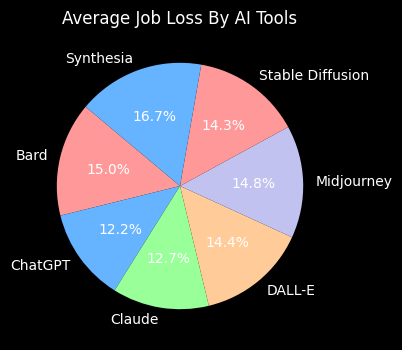

In [137]:
plt.figure(figsize=(4, 4))
plt.pie(Avg_job_lost_by_each_Ai['Job Loss Due to AI (%)'], 
        labels=Avg_job_lost_by_each_Ai['Top AI Tools Used'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])

# Add a title
plt.title('Average Job Loss By AI Tools')

# Show the pie chart
plt.show()


In [102]:
# Revenue Increaed By Each AI 
Revenu_Increased_by_each_Ai=df.groupby(['Top AI Tools Used'])['Revenue Increase Due to AI (%)'].mean().reset_index()
Revenu_Increased_by_each_Ai

,Top AI Tools Used,Revenue Increase Due to AI (%)
0,Bard,38.128750
1,ChatGPT,42.224516
2,Claude,37.210968
3,DALL-E,39.195385
4,Midjourney,36.737568
5,Stable Diffusion,41.414074
6,Synthesia,44.572917


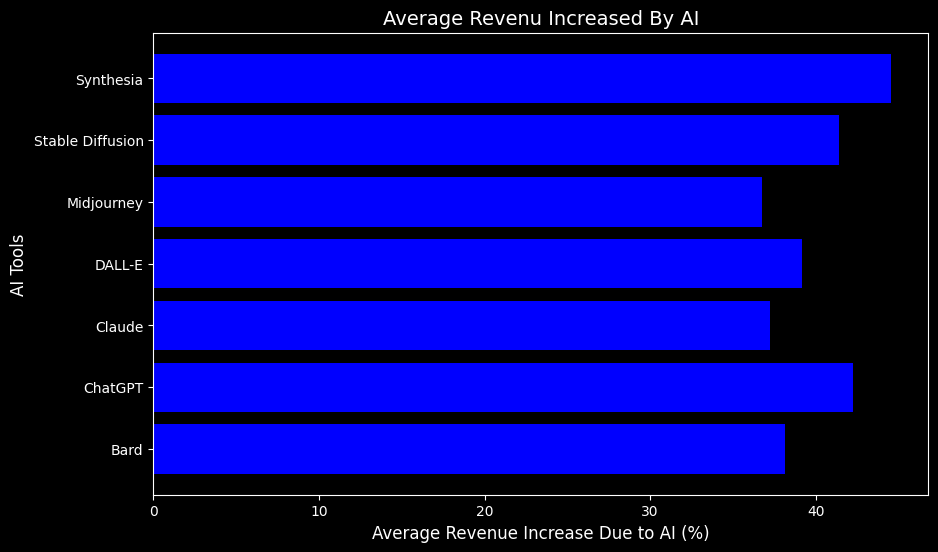

In [139]:
plt.figure(figsize=(10,6))
plt.barh(Revenu_Increased_by_each_Ai['Top AI Tools Used'], Revenu_Increased_by_each_Ai['Revenue Increase Due to AI (%)'], color='blue')

plt.title('Average Revenu Increased By AI', fontsize=14)
plt.xlabel('Average Revenue Increase Due to AI (%)', fontsize=12)
plt.ylabel('AI Tools', fontsize=12)

plt.show()


In [101]:
# Average Revenue Increased by Ai in Each Industry
AvgRevenueIncreasedByEachIndustry1=df[df['Year']==2025].groupby(['Industry','Top AI Tools Used'])['Market Share of AI Companies (%)'].mean().reset_index()
AvgRevenueIncreasedByEachIndustry1.sort_values(ascending=False,by=['Market Share of AI Companies (%)'])

,Industry,Top AI Tools Used,Market Share of AI Companies (%)
7,Gaming,Claude,47.080000
1,Education,Bard,46.630000
22,Marketing,Synthesia,45.040000
11,Healthcare,Claude,42.290000
21,Marketing,Stable Diffusion,41.990000
12,Healthcare,Midjourney,40.980000
13,Healthcare,Stable Diffusion,39.970000
26,Retail,Midjourney,37.315000
27,Retail,Stable Diffusion,36.236667
16,Legal,DALL-E,31.623333


In [95]:
# Average Revenue Increased by Ai in Each Industry
AvgRevenueIncreasedByEachIndustry=df.groupby(['Industry'])['Revenue Increase Due to AI (%)'].mean().reset_index()
AvgRevenueIncreasedByEachIndustry.sort_values(ascending=False,by=['Revenue Increase Due to AI (%)'])

,Industry,Revenue Increase Due to AI (%)
0,Automotive,46.482632
8,Media,43.719677
6,Manufacturing,42.807222
5,Legal,41.824118
1,Education,39.543529
4,Healthcare,38.586471
9,Retail,37.679524
7,Marketing,36.813684
2,Finance,36.257143
3,Gaming,33.234444


In [ ]:
# Average Job Loss by each Industry
AvgJobLossByEachIndustry=df.groupby(['Industry'])['Job Loss Due to AI (%)'].mean().reset_index()
AvgJobLossByEachIndustry

,Industry,Job Loss Due to AI (%)
0,Automotive,28.916842
1,Education,26.142353
2,Finance,27.790000
3,Gaming,27.204074
4,Healthcare,25.579412
5,Legal,28.234118
6,Manufacturing,32.746111
7,Marketing,19.577895
8,Media,22.749032
9,Retail,21.846667


In [87]:
# Data Genearated b each Department
TotalDataGeneratedByEachIndustry=df.groupby(['Industry'])['AI-Generated Content Volume (TBs per year)'].sum().reset_index()
TotalDataGeneratedByEachIndustry_renamed=TotalDataGeneratedByEachIndustry.rename(columns={'AI-Generated Content Volume (TBs per year)':'AI Volume(TBs)'})
TotalDataGeneratedByEachIndustry_renamed

,Industry,AI Volume(TBs)
0,Automotive,820.03
1,Education,1033.99
2,Finance,525.63
3,Gaming,1200.70
4,Healthcare,798.52
5,Legal,1018.35
6,Manufacturing,896.57
7,Marketing,706.75
8,Media,1183.40
9,Retail,1030.58


In [84]:
AvgAIAdoptionRateByIndustry=df.groupby(['Industry'])['AI Adoption Rate (%)'].mean().reset_index()
AvgAIAdoptionRateByIndustry

,Industry,AI Adoption Rate (%)
0,Automotive,54.887895
1,Education,57.028235
2,Finance,55.764286
3,Gaming,60.416296
4,Healthcare,55.734118
5,Legal,56.077647
6,Manufacturing,57.014444
7,Marketing,54.244211
8,Media,47.263226
9,Retail,47.905714


In [82]:
Ai_regulation_status=df.groupby(['Top AI Tools Used','Country'])['Regulation Status'].count().reset_index()

Ai_regulation_status_s=Ai_regulation_status.sort_values(by=['Country'])
Ai_regulation_status_s


,Top AI Tools Used,Country,Regulation Status
27,DALL-E,Australia,3
17,Claude,Australia,6
46,Stable Diffusion,Australia,1
55,Synthesia,Australia,1
7,ChatGPT,Australia,4
...,...,...,...
26,Claude,USA,4
16,ChatGPT,USA,2
36,DALL-E,USA,1
6,Bard,USA,5


In [71]:
# Average Consumer Trust in AI by Brand
Avg_Consumer_trust_in_ai_per_Year=df.groupby(['Top AI Tools Used'])['Consumer Trust in AI (%)'].mean().sort_values(ascending=False).reset_index()
Avg_Consumer_trust_in_ai_per_Year_sorted=Avg_Consumer_trust_in_ai_per_Year.rename(columns={'Consumer Trust in AI (%)':'Average Consumer Trust in AI (%)'})
Avg_Consumer_trust_in_ai_per_Year_sorted

,Top AI Tools Used,Average Consumer Trust in AI (%)
0,Bard,64.315000
1,Midjourney,62.785405
2,Synthesia,60.563750
3,Claude,60.146774
4,ChatGPT,59.235161
5,DALL-E,55.689231
6,Stable Diffusion,52.448889


In [140]:
# Average Consumer Trust in AI by Year
Avg_Consumer_trust_in_ai_per_Year=df.groupby(['Year'])['Consumer Trust in AI (%)'].mean().reset_index()
Avg_Consumer_trust_in_ai_per_Year

,Year,Consumer Trust in AI (%)
0,2020,59.209574
1,2021,59.870625
2,2022,59.438065
3,2023,62.285517
4,2024,58.069565
5,2025,57.943684


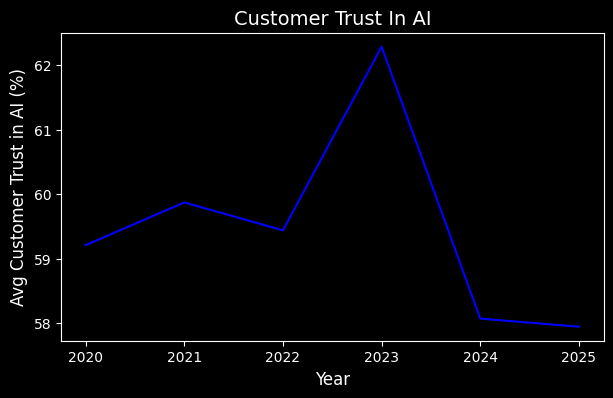

In [147]:
plt.figure(figsize=(7,4))
plt.plot(Avg_Consumer_trust_in_ai_per_Year['Year'], Avg_Consumer_trust_in_ai_per_Year['Consumer Trust in AI (%)'], color='blue')

plt.title('Customer Trust In AI', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Avg Customer Trust in AI (%)', fontsize=12)

plt.show()


In [20]:
df.shape

(200, 12)

In [12]:
df.columns.to_list()

['Country',
 'Year',
 'Industry',
 'AI Adoption Rate (%)',
 'AI-Generated Content Volume (TBs per year)',
 'Job Loss Due to AI (%)',
 'Revenue Increase Due to AI (%)',
 'Human-AI Collaboration Rate (%)',
 'Top AI Tools Used',
 'Regulation Status',
 'Consumer Trust in AI (%)',
 'Market Share of AI Companies (%)']

In [21]:
# Example: Calculate the mean job loss due to AI for each year
jobLossDueToAiBasedOnYear.mean()

Year
2020    28.171915
2021    28.233750
2022    22.823226
2023    24.453448
2024    26.283478
2025    23.918421
Name: Job Loss Due to AI (%), dtype: float64

In [48]:
# Ai Data Generated By Year
Ai_Data_Generated_By_Year = df.groupby('Year')['AI-Generated Content Volume (TBs per year)'].sum().reset_index()
Ai_Data_Generated_By_Year_rename = Ai_Data_Generated_By_Year.rename(columns={'AI-Generated Content Volume (TBs per year)': 'Data Generated By AI (TBs)'})
# Ai_Data_Generated_By_Year_rename['Data in TB']=round(Ai_Data_Generated_By_Year_rename['Data Generated By AI (TBs)'],2).astype(str)+' TB'
Ai_Data_Generated_By_Year_rename

,Year,Data Generated By AI (TBs)
0,2020,1965.87
1,2021,1720.82
2,2022,1451.49
3,2023,1092.96
4,2024,1209.81
5,2025,1773.57


In [ ]:
# Relationship between AI Adoption and Industry:
industry_ai_adoption = df.groupby('Industry')['AI Adoption Rate (%)'].mean().reset_index()
print(industry_ai_adoption)


        Industry  AI Adoption Rate (%)
0     Automotive             54.887895
1      Education             57.028235
2        Finance             55.764286
3         Gaming             60.416296
4     Healthcare             55.734118
5          Legal             56.077647
6  Manufacturing             57.014444
7      Marketing             54.244211
8          Media             47.263226
9         Retail             47.905714


In [ ]:
# AI Tools Used vs. Other Variables:
tools_vs_collaboration = df.groupby('Top AI Tools Used')['Human-AI Collaboration Rate (%)'].mean().reset_index()
print(tools_vs_collaboration)


  Top AI Tools Used  Human-AI Collaboration Rate (%)
0              Bard                        50.379583
1           ChatGPT                        58.167419
2            Claude                        50.729677
3            DALL-E                        58.225385
4        Midjourney                        50.950541
5  Stable Diffusion                        54.330741
6         Synthesia                        57.064583


In [ ]:
#  Industry on Ai Adoption Rate
industry_regulation_analysis = df.groupby(['Industry'])['AI Adoption Rate (%)'].mean().reset_index()
print(industry_regulation_analysis)

        Industry  AI Adoption Rate (%)
0     Automotive             54.887895
1      Education             57.028235
2        Finance             55.764286
3         Gaming             60.416296
4     Healthcare             55.734118
5          Legal             56.077647
6  Manufacturing             57.014444
7      Marketing             54.244211
8          Media             47.263226
9         Retail             47.905714


In [ ]:
consumerTrustByregularStatus = df.groupby('Regulation Status')['Consumer Trust in AI (%)'].mean().reset_index()
print(consumerTrustByregularStatus)


  Regulation Status  Consumer Trust in AI (%)
0           Lenient                 61.392063
1          Moderate                 60.725526
2            Strict                 55.773607


In [149]:
ContryImpactedByAI_sorted=df.groupby(['Country'])['Job Loss Due to AI (%)'].mean().sort_values(ascending=False).reset_index()
ContryImpactedByAI_sorted.rename(columns={'Job Loss Due to AI (%)': 'Average Job Loss Due to AI (%)'}, inplace=True)
ContryImpactedByAI_sorted

,Country,Average Job Loss Due to AI (%)
0,Canada,30.993125
1,China,29.085238
2,Germany,28.104118
3,UK,27.134500
4,France,26.484167
5,South Korea,25.544500
6,Japan,25.509545
7,India,25.231250
8,USA,20.708571
9,Australia,18.824000


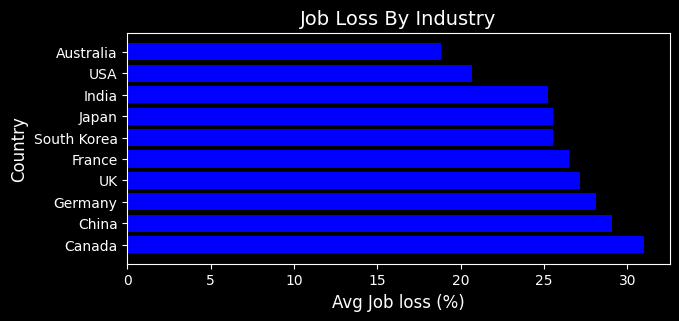

In [153]:
plt.figure(figsize=(7,3))
plt.barh(ContryImpactedByAI_sorted['Country'], ContryImpactedByAI_sorted['Average Job Loss Due to AI (%)'], color='blue')

plt.title('Job Loss By Industry', fontsize=14)
plt.xlabel('Avg Job loss (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.show()
